<AxesSubplot:xlabel='price', ylabel='Count'>

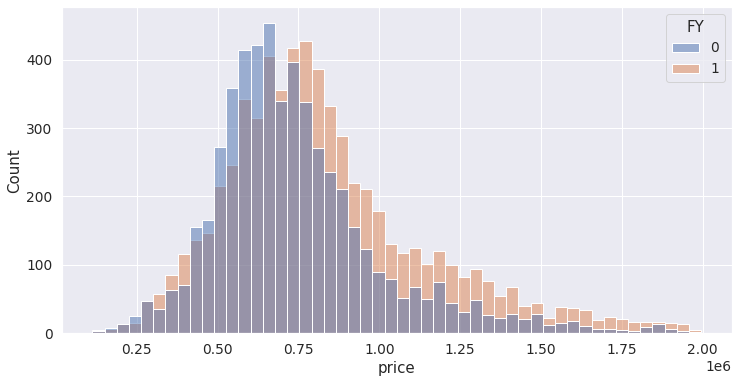

In [168]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set(font_scale=1.25)

# load and format data
data = pd.read_csv("scrapedData.csv")
data["contract date"] = pd.to_datetime(data["contract date"], format="%d/%m/%Y")
data["price"] = pd.to_numeric(data["price"].apply(lambda x: x.replace("$", "").replace(",", "")), errors="coerce")
data["block size"] = pd.to_numeric(data["block size"].apply(lambda x: x.replace("m2", "")), errors="coerce")
residences = [
    '–', 'Single residential dwelling...', 'Single residential dwelling',
    'Multiple unit dwelling', 'Cottage block', 'Medium density dwelling', 'Dwelling',
    'Caretakers residence', 'Detached house', 'Residence', 'Vacant land'
]
suburbs = [
    "Fyshwick", "Mitchell", "Beard", "Hume", "Symonston", "Canberra Airport",
    "Pialligo"
]
data = data[
    (data["contract date"] > pd.Timestamp("2019-06-30")) &
    (data["contract date"] < pd.Timestamp("2021-07-01")) &
    (data["purpose"].apply(lambda x: x in residences)) &
    (data["price"] > 100000) &
    (data["suburb"].apply(lambda x: x not in suburbs))
]
data["FY"] = data["contract date"].apply(lambda x: 0 if x < pd.Timestamp("2020-07-01") else 1)
for i in data.index:
    if data.at[i, "purpose"] == "Single residential dwelling...":
        type = 0
    elif data.at[i, "purpose"] == "Single residential dwelling":
        type = 0
    elif data.at[i, "purpose"] == "Cottage block":
        type = 0
    elif data.at[i, "purpose"] == "Caretakers residence":
        type = 0
    elif data.at[i, "purpose"] == "Detached house":
        type = 0
    elif data.at[i, "purpose"] == "Vacant land":
        type = 0
    elif (data.at[i, "source"] == "Allhomes Record") & ("/" not in data.at[i, "address"]) & (data.at[i, "block size"] < 2000):
        type = 0
    else :
        type = 1
    data.at[i, "type"] = type        

fig, ax = plt.subplots(
#     2, 1,
    figsize=(12, 6)
)
sns.histplot(data=data[(data.type == 0) & (data.price < 2000000)], x="price", bins=50, ax=ax, hue="FY")
# sns.histplot(data=data[(data.FY == 1) & (data.price < 2000000)], x="price", bins=50, ax=ax[1], hue="type")

In [219]:
len(data[(data.FY == 1) & (data.price < 500000) & (data.type == 0)]) / len(data[(data.FY == 1) & (data.type == 0)])

0.10088119112731693

In [239]:
bins = list(range(50000, 2050000, 50000))
hist2020 = pd.DataFrame(columns=["apartments", "houses/land"], index=bins)
hist2021 = pd.DataFrame(columns=["apartments", "houses/land"], index=bins)
hist2020["apartments"] = 0
hist2021["apartments"] = 0
hist2020["houses/land"] = 0
hist2021["houses/land"] = 0

for i in data[data.FY == 0].index:
    for bin in bins:
        if data.at[i, "price"] <= bin:
            if data.at[i, "type"] == 0:
                hist2020.at[bin, "houses/land"] = hist2020.at[bin, "houses/land"] + 1
            else:
                hist2020.at[bin, "apartments"] = hist2020.at[bin, "apartments"] + 1
            break

for i in data[data.FY == 1].index:
    for bin in bins:
        if data.at[i, "price"] <= bin:
            if data.at[i, "type"] == 0:
                hist2021.at[bin, "houses/land"] = hist2021.at[bin, "houses/land"] + 1
            else:
                hist2021.at[bin, "apartments"] = hist2021.at[bin, "apartments"] + 1
            break

hist2020.index.name = "bin"
hist2021.index.name = "bin"
hist2020.to_csv("hist2020.csv")
hist2021.to_csv("hist2021.csv")